<a href="https://colab.research.google.com/github/mjovovic/Programski-Prevodioci/blob/main/ProgamskiPrevodioci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



repeClass 

In [ ]:
from enum import Enum, auto

class Class(Enum):

    #promenjive i tipovi podataka
    TYPE = auto()
    INT = auto()
    CHAR = auto()
    STRING = auto()
    REAL = auto()
    BOOLEAN = auto()

    #artimeticke operacije
    PLUS = auto()   #+
    MINUS = auto()  #- 
    STAR = auto()   #*
    MOD = auto()    #mod
    DIV = auto()    #div
    FWDSLASH = auto() #/

    #logicke operacije
    OR = auto()     #or
    AND = auto()    #and
    NOT = auto()    #not
    XOR = auto()    #xor

    #relacione operacije
    EQ = auto()     #=
    NEQ = auto()    #<> 
    LT = auto()     #<
    GT = auto()     #>
    LTE = auto()    #<=
    GTE = auto()    #>=

    VAR = auto()    #var

    BEGIN = auto()
    END = auto()
    LBRACKET = auto()   #[
    RBRACKET = auto()   #]
    LPAREN = auto()     #(
    RPAREN = auto()     #)
    THEN = auto()

    ASSIGN = auto()     #:=
    SEMICOLON = auto()  #;
    COLON = auto()      #:
    COMMA = auto()      #,
    DOT = auto()        #.
    
    ARRAY = auto()
    OF = auto()

    IF = auto()
    ELSE = auto()
    REPEAT = auto()
    WHILE = auto()
    FOR = auto()
    UNTIL = auto()
    DO = auto()
    TO = auto()
    DOWNTO = auto()

    BREAK = auto()
    CONTINUE = auto()
    EXIT = auto()

    FUNCTION = auto()
    PROCEDURE = auto()
    
    ADDRESS = auto()
    
    ID = auto()
    EOF = auto()
    
    

Lexer

In [ ]:
class Lexer:

    def __init__(self, text):
        self.text = text
        self.len = len(text)
        self.pos = -1

    def read_space(self):
        while self.pos + 1 < self.len and self.text[self.pos + 1].isspace():
            self.next_char()

    def read_int(self):
        lexeme = self.text[self.pos]
        while self.pos + 1 < self.len and self.text[self.pos + 1].isdigit():
            lexeme += self.next_char()
        return int(lexeme)

    def read_char(self):
        self.pos += 1
        lexeme = self.text[self.pos]
        self.pos += 1
        return lexeme

    def read_string(self):
        lexeme = ''
        while self.pos + 1 < self.len and self.text[self.pos + 1] != '\'':
            lexeme += self.next_char()
        self.pos += 1
        return lexeme

    def read_keyword(self):
        lexeme = self.text[self.pos]
        while self.pos + 1 < self.len and self.text[self.pos + 1].isalnum() or self.text[self.pos + 1] == '_':
            lexeme += self.next_char()
        if lexeme == 'if':
            return Token(Class.IF, lexeme)
        elif lexeme == 'else':
            return Token(Class.ELSE, lexeme)
        elif lexeme == 'then':
            return Token(Class.THEN, lexeme)
        elif lexeme == 'while':
            return Token(Class.WHILE, lexeme)
        elif lexeme == 'for':
            return Token(Class.FOR, lexeme)
        elif lexeme == 'break':
            return Token(Class.BREAK, lexeme)
        elif lexeme == 'continue':
            return Token(Class.CONTINUE, lexeme)
        elif lexeme == 'exit':
            return Token(Class.EXIT, lexeme)
        elif lexeme == 'repeat':
            return Token(Class.REPEAT, lexeme)
        elif lexeme == 'until':
            return Token(Class.UNTIL, lexeme)
        elif lexeme == 'do':
            return Token(Class.DO, lexeme)
        elif lexeme == 'to':
            return Token(Class.TO, lexeme)
        elif lexeme == 'downto':
            return Token(Class.DOWNTO, lexeme)
        elif lexeme == 'begin':
            return Token(Class.BEGIN, lexeme)
        elif lexeme == 'end':
            return Token(Class.END, lexeme)
        elif lexeme == 'var':
            return Token(Class.VAR, lexeme)    
        elif lexeme == 'integer' or lexeme == 'char' or lexeme == 'real' or lexeme == 'boolean' or lexeme == 'string':
            return Token(Class.TYPE, lexeme)
        elif lexeme == 'array':
            return Token(Class.ARRAY, lexeme)
        elif lexeme == 'of':
            return Token(Class.OF, lexeme)
        elif lexeme == 'div':
            return Token(Class.DIV, lexeme)
        elif lexeme == 'mod':
            return Token(Class.MOD, lexeme)
        elif lexeme == 'not':
            return Token(Class.NOT, lexeme)
        elif lexeme == 'and':
            return Token(Class.AND, lexeme)
        elif lexeme == 'or':
            return Token(Class.OR, lexeme)
        elif lexeme == 'xor':
            return Token(Class.XOR, lexeme)
        elif lexeme == 'function':
            return Token(Class.FUNCTION, lexeme)
        elif lexeme == 'procedure':
            return Token(Class.PROCEDURE, lexeme)
        return Token(Class.ID, lexeme)

    def next_char(self):
        self.pos += 1
        if self.pos >= self.len:
            return None
        return self.text[self.pos]

    def next_token(self):
        self.read_space()
        curr = self.next_char()
        if curr is None:
            return Token(Class.EOF, curr)
        token = None
        if curr.isalpha():
            token = self.read_keyword()
        elif curr.isdigit():
            token = Token(Class.INT, self.read_int())
        elif curr == '\'':
            token = Token(Class.STRING, self.read_string())
        elif curr == '+':
            token = Token(Class.PLUS, curr)
        elif curr == '-':
            token = Token(Class.MINUS, curr)
        elif curr == '*':
            token = Token(Class.STAR, curr)
        elif curr == '/':
            token = Token(Class.FWDSLASH, curr)
        elif curr == '=':  
            token = Token(Class.EQ, '=')
        elif curr == '<':
            curr = self.next_char()
            if curr == '=':
                token = Token(Class.LTE, '<=')
            elif curr == '>':
                token = Token(Class.NEQ, '<>')
            else:
                token = Token(Class.LT, '<')
                self.pos -= 1
        elif curr == '>':
            curr = self.next_char()
            if curr == '=':
                token = Token(Class.GTE, '>=')
            else:
                token = Token(Class.GT, '>')
                self.pos -= 1
        elif curr == '(':
            token = Token(Class.LPAREN, curr)
        elif curr == ':':
            curr = self.next_char()
            if curr == '=':
                token = Token(Class.ASSIGN, curr)
            else:
                token = Token(Class.COLON, ':')
                self.pos -=1
        elif curr == ')':
            token = Token(Class.RPAREN, curr)
        elif curr == '[':
            token = Token(Class.LBRACKET, curr)
        elif curr == ']':
            token = Token(Class.RBRACKET, curr)
        elif curr == ';':
            token = Token(Class.SEMICOLON, curr)
        elif curr == ',':
            token = Token(Class.COMMA, curr)
        elif curr == '.':
            token = Token(Class.DOT, curr)
        else:
            self.die(curr)
        return token

    def lex(self):
        tokens = []
        while True:
            curr = self.next_token()
            tokens.append(curr)
            if curr.class_ == Class.EOF:
                break
        return tokens

    def die(self, char):
      
        raise SystemExit("Unexpected character: {}".format(char))

token

In [ ]:


class Token:

    def __init__(self, class_, lexeme):
        self.class_ = class_
        self.lexeme = lexeme

    def __str__(self):
        return "<{} {}>".format(self.class_, self.lexeme)

Node 

In [ ]:
class Node():
    pass


class Program(Node):
    def __init__(self, nodes):
        self.nodes = nodes


#blok koda za repeat
class Block(Node):
    def __init__(self, nodes):
        self.nodes = nodes
        
class RepeatBlock(Node):
    def __init__(self, nodes):
        self.nodes = nodes
        


#deklaracija varijabli
class VarDecl(Node):
    def __init__(self, type_, id_):
        self.type_ = type_
        self.id_ = id_

class StringDecl(Node):
    def __init__(self, id_, type_, lenght, elements):
        self.id_ = id_
        self.type_ = type_
        self.lenght = lenght
        self.elements = elements

#deklaracija niza
class ArrayDecl(Node):
    def __init__(self, type_, id_, size, elems):
        self.type_ = type_
        self.id_ = id_
        self.size = size
        self.elems = elems

#element niza
class ArrayElem(Node):
    def __init__(self, value, index):
        self.value = value
        self.index = index

class StringElem(Node):
    def __init__(self, value, index):
        self.value = value
        self.index = index

#dodela vrednosti
class Assign(Node):
    def __init__(self, id_, expr):
        self.id_ = id_
        self.expr = expr

class VarInit(Node):
    def __init__(self, id_, expr, type_):
        self.id_ = id_
        self.expr = expr
        self.type_ = type_
        
class VarBlock(Node):
    def __init__(self, node_list):
        self.node_list = node_list


class If(Node):
    def __init__(self, cond, true, false):
        self.cond = cond
        self.true = true
        self.false = false


class While(Node):
    def __init__(self, cond, block):
        self.cond = cond
        self.block = block

class Repeat(Node):
    def __init__(self, cond, repeat_block):
        self.cond = cond
        self.repeat_block = repeat_block

class For(Node):
    def __init__(self, init, cond, block, direction):
        self.init = init
        self.cond = cond
        self.block = block
        self.direction = direction

class FuncImpl(Node):
    def __init__(self, type_, id_, params, var_block, block):
        self.type_ = type_
        self.id_ = id_
        self.params = params
        self.var_block = var_block
        self.block = block


class FuncCall(Node):
    def __init__(self, id_, args):
        self.id_ = id_
        self.args = args

class ProcedureCall(Node):
    def __init__(self, id_, args):
        self.id = id_
        self.args = args

class ProcedureImpl(Node):
    def __init__(self, id_, params, var_block, block):
        self.id_ = id_
        self.params = params
        self.var_block = var_block
        self.block = block



class Params(Node):
    def __init__(self, params):
        self.params = params


class Args(Node):
    def __init__(self, args):
        self.args = args

class Arg(Node):
    def __init__(self, arg, format):
        self.arg = arg
        self.format = format


class Elems(Node):
    def __init__(self, elems):
        self.elems = elems


class Break(Node):
    pass


class Continue(Node):
    pass

class Exit(Node):
    def __init__(self, expr):
        self.expr = expr

class Type(Node):
    def __init__(self, value):
        self.value = value


class Int(Node):
    def __init__(self, value):
        self.value = value


class Char(Node):
    def __init__(self, value):
        self.value = value

class Real(Node):
    def __init__(self, value):
        self.value = value

class Boolean(Node):
    def __init__(self, value):
        self.value = value

class True_(Node):
    pass

class Flase_(Node):
    pass

class String(Node):
    def __init__(self, value):
        self.value = value
        
class Direction(Node):
    def __init__(self, direction):
        self.direction = direction


class Id(Node):
    def __init__(self, value):
        self.value = value


class BinOp(Node):
    def __init__(self, symbol, first, second):
        self.symbol = symbol
        self.first = first
        self.second = second


class UnOp(Node):
    def __init__(self, symbol, first):
        self.symbol = symbol
        self.first = first

Parser

In [ ]:
from functools import wraps
import pickle

class Parser:
    def __init__(self, tokens):
        self.tokens = tokens
        self.curr = tokens.pop(0)
        self.prev = None

    def restorable(call):
        @wraps(call)
        def wrapper(self, *args, **kwargs):
            state = pickle.dumps(self.__dict__)
            result = call(self, *args, **kwargs)
            self.__dict__ = pickle.loads(state)
            return result
        return wrapper

    def eat(self, class_):
        if self.curr.class_ == class_:
            self.prev = self.curr
            self.curr = self.tokens.pop(0)
        else:
            self.die_type(class_.name, self.curr.class_.name)

    def program(self):
        nodes = []
        while self.curr.class_ != Class.EOF and self.curr.class_ != Class.DOT:
            if self.curr.class_ == Class.VAR:
                nodes.append(self.var())
            elif self.curr.class_ == Class.BEGIN:
                nodes.append(self.block())
            elif self.curr.class_ == Class.FUNCTION:
                nodes.append(self.func())
            elif self.curr.class_ == Class.PROCEDURE:
                nodes.append(self.proc())
            elif self.curr.class_ == Class.SEMICOLON:
                self.eat(Class.SEMICOLON)
        return Program(nodes)

    def id_(self):
        id_ = Id(self.curr.lexeme)
        self.eat(Class.ID)
        if self.curr.class_ == Class.LPAREN :
            self.eat(Class.LPAREN)
            args = self.args()
            self.eat(Class.RPAREN)
            return FuncCall(id_, args)
        elif self.curr.class_ == Class.LBRACKET:
            self.eat(Class.LBRACKET)
            index = self.logic()
            self.eat(Class.RBRACKET)
            id_ = ArrayElem(id_, index)
        if self.curr.class_ == Class.ASSIGN:
            self.eat(Class.ASSIGN)
            expr = self.logic()
            return Assign(id_, expr)
        else:
            return id_

    def var(self):

        if self.curr.class_ != Class.VAR:
            return None

        self.eat(Class.VAR)

        array_decl = []
        array_init = []
        var_decl = []
        var_init = []
        while self.curr.class_ != Class.BEGIN:
            id_list = []
            #getting ids x, y, i: integer;
            while self.curr.class_ != Class.COLON:
                if self.curr.class_ != Class.COMMA:
                    id_list.append( self.curr.lexeme )
                self.eat(self.curr.class_)
            self.eat(Class.COLON)
            #vars

            if self.curr.class_ == Class.TYPE:
            #u sluaju da je string
                if self.curr.lexeme == 'string':
                    type_ = self.type_()
                    if self.curr.class_ == Class.LBRACKET:
                        self.eat(Class.LBRACKET)
                        s_len = self.curr.lexeme
                        self.eat(self.curr.class_)
                        self.eat(Class.RBRACKET)
                        
                        for i in id_list:
                            var_decl.append(StringDecl(Id(i), type_,  Int(s_len), None))
                    else:
                        for i in id_list:
                            var_decl.append(StringDecl(Id(i), type_,  None, None))
                        self.eat(Class.SEMICOLON)  
                #if is normal var
                else:
                    type_ = self.type_()
                    if  self.curr.class_ == Class.SEMICOLON:
                        self.eat(Class.SEMICOLON)
                        for i in id_list:
                            var_decl.append(VarDecl(type_, Id(i)))
                        
                    #init pa uzmimamo samo prvo posto ne moze vise njh da se inicijalizuej
                    else:
                        self.eat(Class.EQ)
                        num = self.curr.lexeme
                        self.eat(self.curr.class_)
                        self.eat(Class.SEMICOLON)
                        var_init.append(VarInit(Id(id_list[0]), num,  type_))
                        
            
            elif self.curr.class_ == Class.ARRAY:
                self.eat(Class.ARRAY)
                self.eat(Class.LBRACKET)
                index1 = self.curr.lexeme
                self.eat(self.curr.class_)
                if self.curr.class_ == Class.DOT:
                    self.eat(Class.DOT)
                    self.eat(Class.DOT)
                    index2 = self.curr.lexeme
                    self.eat(self.curr.class_)
                    size = Int(index2 - index1 + 1) 
                else:
                    size = Int(index1) 
                self.eat(Class.RBRACKET)
                self.eat(Class.OF)
                type_ = self.type_()
                if self.curr.class_ == Class.SEMICOLON:
                    self.eat(Class.SEMICOLON)
                    elems = None
                    for i in id_list:
                        array_init.append(ArrayDecl(type_, Id(i), size, elems))
                    
                elif self.curr.class_ == Class.EQ:
                    self.eat(Class.EQ)
                    self.eat(Class.LPAREN)
                    array_elems = []
                    while self.curr.class_ != Class.RPAREN:
                        if self.curr.class_ == Class.COMMA:
                            self.eat(Class.COMMA)
                        array_elems.append(self.curr.lexeme)
                        self.eat(self.curr.class_)
                    elems = []
                    counter = 0
                    
                    for i in array_elems:
                        elems.append(ArrayElem(Int(i), Int(counter)))
                        counter+=1
                        
                    self.eat(Class.RPAREN)
                    self.eat(Class.SEMICOLON)
                    for i in id_list:
                        array_init.append(ArrayDecl(type_, Id(i), size, elems))
        node_list = []

        node_list = (var_decl, var_init, array_decl, array_init)
        
        return VarBlock(node_list)
        
    def func(self):
        self.eat(Class.FUNCTION)
        
        id_ = self.curr.lexeme
        self.eat(Class.ID)
        self.eat(Class.LPAREN)
        params = self.params()
        self.eat(Class.RPAREN)
        self.eat(Class.COLON)
        return_ = self.type_()
        self.eat(Class.SEMICOLON)
        var = None
        if self.curr.class_ == Class.VAR:
            var = self.var()
        return FuncImpl(return_, Id(id_), params, var, self.block())


    def proc(self):
       
        self.eat(Class.PROCEDURE)
        id_ = self.curr.lexeme  
        self.eat(Class.ID)
        self.eat(Class.LPAREN)
        params = self.params()   
        self.eat(Class.RPAREN)
        self.eat(Class.SEMICOLON)

        return ProcedureImpl(Id(id_), params, self.var(), self.block())

    def if_(self):
        self.eat(Class.IF)
        cond = self.logic()
        self.eat(Class.THEN)
        true = self.block()
        false = None
        if self.curr.class_ == Class.ELSE:
            self.eat(Class.ELSE)
            false = self.block()
        
        return If(cond, true, false)

    def while_(self):
        self.eat(Class.WHILE)
        cond = self.logic()
        self.eat(Class.DO)
        block = self.block()
        return While(cond, block)

 

    def for_(self):
        self.eat(Class.FOR)
        init = self.id_()
        if self.curr.class_ == Class.TO:
            direction = Direction(self.curr.lexeme)
            self.eat(Class.TO)
        else:
            direction = Direction(self.curr.lexeme)
            self.eat(Class.DOWNTO)
        cond = self.logic()
        self.eat(Class.DO)
        block = self.block()
        return For(init, cond, block, direction)


    def repeat(self):
        self.eat(Class.REPEAT)
        block = self.repeat_block()
        cond = self.logic()
        return Repeat(cond, block)

    def repeat_block(self):
        write_block = self.write_block(Class.UNTIL)
        self.eat(Class.UNTIL)
        return RepeatBlock(write_block)



    def block(self):
        self.eat(Class.BEGIN)
        write_block = self.write_block(Class.END)
        self.eat(Class.END)
        return Block(write_block) 


    def write_block(self, end_write_block):
        write_block = []
        while self.curr.class_ != end_write_block:
            if self.curr.class_ == Class.ID:
                tmp = self.id_()
            elif self.curr.class_ == Class.IF:
                tmp = self.if_()
            elif self.curr.class_ == Class.FOR:
                tmp = self.for_()
            elif self.curr.class_ == Class.WHILE:
                tmp = self.while_()
            elif self.curr.class_ == Class.REPEAT:
                tmp = self.repeat()
            elif self.curr.class_ == Class.EXIT:
                tmp = self.exit_()
            elif self.curr.class_ == Class.BREAK:
                tmp = self.break_()
            elif self.curr.class_ == Class.CONTINUE:
                tmp = self.continue_()
            self.eat(Class.SEMICOLON)
            write_block.append(tmp)
        return write_block

    def params(self):
        params = []
        tmp_params = []
        while self.curr.class_ != Class.COLON:
            if self.curr.class_ != Class.COMMA:
                tmp_params.append(Id(self.curr.lexeme))
            self.eat(self.curr.class_)
        self.eat(Class.COLON)
        type_ = self.type_()
        for i in tmp_params:
            params.append(VarDecl(type_, i))
        return Params(params)

    def args(self):
        args = []
        while self.curr.class_ != Class.RPAREN:
            if self.curr.class_ == Class.COMMA:
                self.eat(Class.COMMA)
          
            tmp_expr = self.expr()
            if self.curr.class_ == Class.COLON:
                self.eat(Class.COLON)
                self.eat(self.curr.class_)
                self.eat(Class.COLON)
                tmp = self.curr.lexeme
                self.eat(self.curr.class_)
                args.append(Arg(tmp_expr, Int(tmp)))
            else:
                args.append(Arg(tmp_expr, None))
        return Args(args)

    def elems(self):
        elems = []
        while self.curr.class_ != Class.RBRACE:
            if len(elems) > 0:
                self.eat(Class.COMMA)
            elems.append(self.logic())
        return Elems(elems)


    def break_(self):
        self.eat(Class.BREAK)
        return Break()

    def continue_(self):
        self.eat(Class.CONTINUE)
        return Continue()
    
    def exit_(self):
        self.eat(Class.EXIT)
        expr = None
        if self.curr.class_ == Class.LPAREN:
            self.eat(Class.LPAREN)
            expr = self.logic()
            self.eat(Class.RPAREN)
        return Exit(expr)


    def type_(self):
        type_ = Type(self.curr.lexeme)
        self.eat(Class.TYPE)
        return type_

    def factor(self):
        if self.curr.class_ == Class.INT:
            value = Int(self.curr.lexeme)
            self.eat(Class.INT)
            return value
        elif self.curr.class_ == Class.CHAR:
            value = Char(self.curr.lexeme)
            self.eat(Class.CHAR)
            return value
        elif self.curr.class_ == Class.STRING:
            value = String(self.curr.lexeme)
            self.eat(Class.STRING)
            return value
        elif self.curr.class_ == Class.ID:
            return self.id_()
        elif self.curr.class_ in [Class.MINUS, Class.NOT, Class.ADDRESS]:
            op = self.curr
            self.eat(self.curr.class_)
            first = None
            if self.curr.class_ == Class.LPAREN:
                self.eat(Class.LPAREN)
                first = self.logic()
                self.eat(Class.RPAREN)
            else:
                first = self.factor()
            return UnOp(op.lexeme, first)
        elif self.curr.class_ == Class.LPAREN:
            self.eat(Class.LPAREN)
            first = self.logic()
            self.eat(Class.RPAREN)
            return first
        elif self.curr.class_ == Class.SEMICOLON:
            return None
        else:
            self.die_deriv(self.factor.__name__)

    def term(self):
        first = self.factor()
        while self.curr.class_ in [Class.STAR, Class.FWDSLASH, Class.MOD, Class.DIV]:
            if self.curr.class_ == Class.STAR:
                op = self.curr.lexeme
                self.eat(Class.STAR)
                second = self.factor()
                first = BinOp(op, first, second)
            elif self.curr.class_ == Class.FWDSLASH:
                op = self.curr.lexeme
                self.eat(Class.FWDSLASH)
                second = self.factor()
                first = BinOp(op, first, second)
            elif self.curr.class_ == Class.MOD:
                op = self.curr.lexeme
                self.eat(Class.MOD)
                second = self.factor()
                first = BinOp(op, first, second)
            elif self.curr.class_ == Class.DIV:
                op = self.curr.lexeme
                self.eat(Class.DIV)
                second = self.factor()
                first = BinOp(op, first, second)
        return first



    def expr(self):
        first = self.term()
        while self.curr.class_ in [Class.PLUS, Class.MINUS]:
            if self.curr.class_ == Class.PLUS:
                op = self.curr.lexeme
                self.eat(Class.PLUS)
                second = self.term()
                first = BinOp(op, first, second)
            elif self.curr.class_ == Class.MINUS:
                op = self.curr.lexeme
                self.eat(Class.MINUS)
                second = self.term()
                first = BinOp(op, first, second)
        return first

    def compare(self):
        first = self.expr()
        if self.curr.class_ == Class.EQ:
            op = self.curr.lexeme
            self.eat(Class.EQ)
            second = self.expr()
            return BinOp(op, first, second)
        elif self.curr.class_ == Class.NEQ:
            op = self.curr.lexeme
            self.eat(Class.NEQ)
            second = self.expr()
            return BinOp(op, first, second)
        elif self.curr.class_ == Class.LT:
            op = self.curr.lexeme
            self.eat(Class.LT)
            second = self.expr()
            return BinOp(op, first, second)
        elif self.curr.class_ == Class.GT:
            op = self.curr.lexeme
            self.eat(Class.GT)
            second = self.expr()
            return BinOp(op, first, second)
        elif self.curr.class_ == Class.LTE:
            op = self.curr.lexeme
            self.eat(Class.LTE)
            second = self.expr()
            return BinOp(op, first, second)
        elif self.curr.class_ == Class.GTE:
            op = self.curr.lexeme
            self.eat(Class.GTE)
            second = self.expr()
            return BinOp(op, first, second)
        else:
            return first

    def logic_term(self):
        first = self.compare()
        while self.curr.class_ == Class.AND:
            op = self.curr.lexeme
            self.eat(Class.AND)
            second = self.compare()
            first = BinOp(op, first, second)
        return first

    def logic(self):
        first = self.logic_term()
        while self.curr.class_ == Class.OR:
            op = self.curr.lexeme
            self.eat(Class.OR)
            second = self.logic_term()
            first = BinOp(op, first, second)
        
        return first

    @restorable
    def is_func_call(self):
        try:
            self.eat(Class.LPAREN)
            self.args()
            self.eat(Class.RPAREN)
            return self.curr.class_ != Class.LBRACE
        except:
            return False

    def parse(self):
        return self.program()

    def die(self, text):
        raise SystemExit(text)

    def die_deriv(self, fun):
        self.die("Derivation error: {}".format(fun))

    def die_type(self, expected, found):
        self.die("Expected: {}, Found: {}".format(expected, found))

Visitor 

In [ ]:
class Visitor():
    def visit(self, parent, node):
        method = 'visit_' + type(node).__name__
        visitor = getattr(self, method, self.die)
        return visitor(parent, node)

    def die(self, parent, node):
        method = 'visit_' + type(node).__name__
        raise SystemExit("Missing method: {}".format(method))

 Grapher

In [ ]:
!apt install -y graphviz
!pip install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [ ]:
from graphviz import Digraph, Source
from IPython.display import Image

In [ ]:
class Grapher(Visitor):
    def __init__(self, ast):
        self.ast = ast
        self._count = 1
        self.dot = Digraph()
        self.dot.node_attr['shape'] = 'box'
        self.dot.node_attr['height'] = '0.1'
        self.dot.edge_attr['arrowsize'] = '0.5'

    def add_node(self, parent, node, name=None):
        node._index = self._count
        self._count += 1
        caption = type(node).__name__
        if name is not None:
            caption = '{} : {}'.format(caption, name)
        self.dot.node('node{}'.format(node._index), caption)
        if parent is not None:
            self.add_edge(parent, node)

    def add_edge(self, parent, node):
        src, dest = parent._index, node._index
        self.dot.edge('node{}'.format(src), 'node{}'.format(dest))

    

    def visit_Program(self, parent, node):
        self.add_node(parent, node)
        for n in node.nodes:
            if n is not None:
                self.visit(node, n)

    def visit_Block(self, parent, node):
        self.add_node(parent, node)
        for n in node.nodes:
            self.visit(node, n)

    def visit_RepeatBlock(self, parent, node):
        self.add_node(parent, node)
        for n in node.nodes:
            self.visit(node, n)

    def visit_VarDecl(self, parent, node):
        self.add_node(parent, node)
        self.visit(node, node.type_)
        self.visit(node, node.id_)

    def visit_StringDecl(self, parent, node):
        self.add_node(parent, node)
        self.visit(node, node.id_)
        self.visit(node, node.type_)
        if node.lenght != None:
            self.visit(node, node.lenght)

        if node.elements != None:
            self.visit(node, node.elements)


    def visit_ArrayDecl(self, parent, node):
        self.add_node(parent, node)
        self.visit(node, node.type_)
        self.visit(node, node.id_)
        self.visit(node, node.size)
        if node.elems is not None:
            for i in node.elems:
                self.visit(node, i)

    def visit_ArrayElem(self, parent, node):
        self.add_node(parent, node)
        self.visit(node, node.value)
        self.visit(node, node.index)
        

    def visit_Assign(self, parent, node):
        self.add_node(parent, node)
        self.visit(node, node.id_)
        self.visit(node, node.expr)
    
    def visit_VarInit(self, parent, node):
        self.add_node(parent, node)
        self.visit(node, node.id_)
        self.visit(node, node.expr)
        self.visit(node, node.type_)

    def visit_VarBlock(self, parent, node):
        self.add_node(parent, node)
        for n in node.node_list:
            for i in n:
                if i is not None:
                    self.visit(node, i)

    
    def visit_If(self, parent, node):
        self.add_node(parent, node)
        self.visit(node, node.cond)
        self.visit(node, node.true)
        if node.false is not None:
            self.visit(node, node.false)

    def visit_While(self, parent, node):
        self.add_node(parent, node)
        self.visit(node, node.cond)
        self.visit(node, node.block)

    def visit_Repeat(self, parent, node):
        self.add_node(parent, node)
        self.visit(node, node.cond)
        self.visit(node, node.repeat_block)

    def visit_For(self, parent, node):
        self.add_node(parent, node)
        self.visit(node, node.init)
        self.visit(node, node.direction)
        self.visit(node, node.cond)
        self.visit(node, node.block)

    def visit_FuncImpl(self, parent, node):
        self.add_node(parent, node)
        self.visit(node, node.type_)
        self.visit(node, node.id_)
        self.visit(node, node.params)
        if node.var_block != None:
            self.visit(node, node.var_block)
        self.visit(node, node.block)

    def visit_FuncCall(self, parent, node):
        self.add_node(parent, node)
        self.visit(node, node.id_)
        self.visit(node, node.args)

    def visit_ProcedureImpl(self, parent, node):
        self.add_node(parent, node)
        self.visit(node, node.id_)
        self.visit(node, node.params)
        if node.var_block != None:
            self.visit(node, node.var_block)
        self.visit(node, node.block)

    def visit_ProcedureCall(self, parent, node):
        self.add_node(parent, node)
        self.visit(node, node.id_)
        self.visit(node, node.args)

    def visit_Params(self, parent, node):
        self.add_node(parent, node)
        for p in node.params:
            self.visit(node, p)

    def visit_Args(self, parent, node):
        self.add_node(parent, node)
        for a in node.args:
            self.visit(node, a)

    def visit_Direction(self, parent, node):
        
        self.add_node(parent, node)
        

    def visit_Arg(self, parent, node):
        self.add_node(parent, node)
        self.visit(node, node.arg)
        if node.format != None:
            self.visit(node, node.format)

    def visit_Elems(self, parent, node):
        self.add_node(parent, node)
        for e in node.elems:
            self.visit(node, e)

    def visit_Break(self, parent, node):
        self.add_node(parent, node)

    def visit_Continue(self, parent, node):
        self.add_node(parent, node)

    def visit_Exit(self, parent, node):
        self.add_node(parent, node)
        if node.expr != None:
            self.visit(node, node.expr)
        
    def visit_Type(self, parent, node):
        name = node.value
        self.add_node(parent, node, name)

    def visit_Real(self, parent, node):
        name = node.value
        self.add_node(parent, node, name)

    def visit_Boolean(self, parent, node):
        name = node.value
        self.add_node(parent, node, name)

    def visit_Int(self, parent, node):
        name = node.value
        self.add_node(parent, node, name)

    def visit_Char(self, parent, node):
        name = node.value
        self.add_node(parent, node, name)

    def visit_String(self, parent, node):
        name = node.value
        self.add_node(parent, node, name)

    def visit_Id(self, parent, node):
        name = node.value
        self.add_node(parent, node, name)

    def visit_BinOp(self, parent, node):
        name = node.symbol
        self.add_node(parent, node, name)
        self.visit(node, node.first)
        self.visit(node, node.second)

    def visit_UnOp(self, parent, node):
        name = node.symbol
        self.add_node(parent, node, name)
        self.visit(node, node.first)

    def graph(self):
        self.visit(None, self.ast)
        s = Source(self.dot.source, filename='graph', format='png')
        return s.view()

Generator

In [ ]:
import re

Symbolizer

In [ ]:
class Symbol:
    def __init__(self, id_, type_, scope):
        self.id_ = id_
        self.type_ = type_
        self.scope = scope

    def __str__(self):
        return "<{} {} {}>".format(self.id_, self.type_, self.scope)

    def copy(self):
        return Symbol(self.id_, self.type_, self.scope)

In [ ]:
class Symbols:
    def __init__(self):
        self.symbols = {}

    def put(self, id_, type_, scope):
        self.symbols[id_] = Symbol(id_, type_, scope)

    def get(self, id_):
        return self.symbols[id_]

    def contains(self, id_):
        return id_ in self.symbols

    def remove(self, id_):
        del self.symbols[id_]
    
    def __len__(self):
        return len(self.symbols)

    def keys(self):
        return self.symbols.keys()

        
    def __str__(self):
        out = ""
        for _, value in self.symbols.items():
            if len(out) > 0:
                out += "\n"
            out += str(value)
        return out

    def __iter__(self):
        return iter(self.symbols.values())

    def __next__(self):
        return next(self.symbols.values())

In [ ]:
class Symbolizer(Visitor):
    def __init__(self, ast):
        self.ast = ast


    def visit_Program(self, parent, node):
        node.symbols = Symbols()
        for n in node.nodes:
            self.visit(node, n)

    def visit_VarDecl(self, parent, node):
        parent.symbols.put(node.id_.value, node.type_.value, id(parent))

    def visit_ArrayDecl(self, parent, node):
        node.symbols = parent.symbols
        parent.symbols.put(node.id_.value, node.type_.value, id(parent))
        if node.elems is not None:
            for i in node.elems:
                self.visit(node, i)

    def visit_ArrayElem(self, parent, node):
        parent.symbols.put(node.value.value, parent.type_.value, id(parent))


    def visit_StringDecl(self, parent, node):
        parent.symbols.put(node.id_.value, node.type_.value, id(parent))
      

    def visit_Assign(self, parent, node):
        pass

    def visit_If(self, parent, node):
        node.symbols = parent.symbols
        self.visit(node, node.true)
        if node.false is not None:
            self.visit(node, node.false)

    def visit_While(self, parent, node):
        node.symbols = parent.symbols
        self.visit(node, node.block)

    def visit_VarBlock(self, parent, node):
        node.symbols = parent.symbols
        for n in node.node_list:
            for i in n:
                if i is not None:
                    self.visit(node, i)

    def visit_For(self, parent, node):
        node.symbols = parent.symbols
        self.visit(node, node.block)

    

    def visit_Repeat(self, parent, node):
        node.symbols = parent.symbols
        self.visit(node, node.repeat_block)
        
    
    def visit_FuncImpl(self, parent, node):
        node.symbols = Symbols()
        parent.symbols.put(node.id_.value, node.type_.value, id(parent))
        if node.var_block != None:
            self.visit(node, node.var_block)
        self.visit(node, node.block)
        self.visit(node, node.params)

    def visit_ProcedureImpl(self, parent, node):
        node.symbols = Symbols()
        parent.symbols.put(node.id_.value, None, id(parent))
        if node.var_block != None:
            self.visit(node, node.var_block)
        self.visit(node, node.block)
        self.visit(node, node.params)


    def visit_FuncCall(self, parent, node):
        node.symbols = parent.symbols
        parent.symbols.put(node.id_.value, None, id(parent))

    def visit_ProcedureCall(self, parent, node):
        node.symbols = parent.symbols
        parent.symbols.put(node.id_.value, None, id(parent))
        
    def visit_Block(self, parent, node):
        node.symbols = parent.symbols
        for n in node.nodes:
            self.visit(node, n)

    
    def visit_RepeatBlock(self, parent, node):
        node.symbols = parent.symbols
        for n in node.nodes:
            self.visit(node, n)


    def visit_Params(self, parent, node):
        node.symbols = Symbols()
        for p in node.params:
            self.visit(node, p)
            self.visit(parent.block, p)

    def visit_Args(self, parent, node):
        pass

    def visit_Arg(self, parent, node):
        pass

    def visit_Direction(self, parent, node):
        pass

    def visit_Elems(self, parent, node):
        pass

    def visit_Break(self, parent, node):
        pass

    def visit_Continue(self, parent, node):
        pass

    def visit_Return(self, parent, node):
        pass

    def visit_Exit(self, parent, node):
        pass

    def visit_Type(self, parent, node):
        pass

    def visit_Int(self, parent, node):
        pass

    def visit_Char(self, parent, node):
        pass

    def visit_String(self, parent, node):
        pass

    def visit_Id(self, parent, node):
        pass

    def visit_BinOp(self, parent, node):
        pass

    def visit_UnOp(self, parent, node):
        pass

    def symbolize(self):
        self.visit(None, self.ast)

In [ ]:
class Generator(Visitor):
    def __init__(self, ast):
        self.ast = ast
        self.c = ""
        self.level = 0

    def append(self, text):
        self.c += str(text)

    def newline(self):
        self.append('\n\r')

    def indent(self):
        for i in range(self.level):
            self.append('\t')
            
            
    def visit_Program(self, parent, node):
        main_check = 0
        self.append('#include<stdio.h>\n')
        self.append('#include<stdlib.h>\n')
        self.append('#define chr(a) ((char) a)\n')
        self.append('#define ord(a) ((int) a)\n')
        self.append('#define inc(a)((char) a)\n')
        self.append('#define dec(a)(a--)\n')
        self.append('#define insert(src, dest, index)( dest[index-1] = src)\n')
        self.append('#define length(str) (strlen(str))\n')
        self.newline()
        for n in node.nodes:
            if isinstance(n, VarBlock) or isinstance(n, Block):
                if main_check == 0:
                    self.append('int main() {')
                    self.newline()
                    main_check = 1
                    self.level += 1
            self.visit(node, n)
        if main_check == 1:
            self.append('return 0;')
            self.newline()
            self.append('}')


        
      
    def visit_VarDecl(self, parent, node):
        self.visit(node, node.type_)
        self.append(' ')
        
        self.append(node.id_.value)
       

    def visit_StringDecl(self, parent, node):
        self.visit(node, node.type_)
        self.append(' ')
        self.append(node.id_.value)
        self.append('[')
        if node.lenght == None:
            self.append('100')
        else:
            self.append(node.lenght.value)
        self.append(']')
        

    def visit_ArrayDecl(self, parent, node):
        self.visit(node, node.type_)
        self.append(' ')
        self.append(node.id_.value)
        self.append('[')
        if node.size == None:
            self.append('100')
        else:
            self.append(node.size.value)
        self.append(']')
        if node.elems != None:
            self.append(' = ')
            self.append('{')
            len1 = len(node.elems)
            counter = 0
            for i in node.elems:
                self.visit(node, i)
                counter += 1
                if counter < len1:
                    self.append(',')
            self.append(' ')
            self.append('}')
            

    def visit_ArrayElem(self, parent, node):
        self.append(node.value.value)
        self.append('[')
        if isinstance(node.index, BinOp):
            self.visit_BinOp(node, node.index)
        else:
            self.append(node.index.value)
        self.append('-1')
        self.append(']')
        
    def visit_VarBlock(self, parent, node):
        self.level+=1
        for n in node.node_list:
            for i in n:
                
                self.indent()
                self.visit(node, i)
                self.append(';')
                self.append('\n')
        self.level-=1
    def visit_Type(self, parent, node):
        if  node.value == 'integer':
            self.append('int')
        elif node.value == 'char' or node.value == 'string':
            self.append('char')
        elif node.value == 'real':
            self.append('float')
        elif node.value == 'boolean':
            self.append('char')
            
        self.append(' ')
        

    def visit_Int(self, parent, node):
        self.append(node.value)

    def visit_Char(self, parent, node):
        #self.append(ord(node.value))
        self.append("'")
        self.append(node.value)
        self.append("'")

    def visit_String(self, parent, node):
        self.append('"')
        self.append(node.value)
        self.append('"')

    def visit_Real(self,parents, node):
        self.append(node.value)

    def visit_Id(self, parent, node):
        self.append(node.value)

    def visit_Boolean(self, parent, node):
        
        if node.value == 'true':
            self.append(0)
        else:
            self.append(1)
        

    def visit_Block(self, parent, node):
        self.level += 1
      
        for n in node.nodes:
            self.newline()
            self.indent()
            self.visit(node, n)
            self.newline()
   
        self.level -= 1

 
    def visit_RepeatBlock(self, parent, node):
        self.level += 1
      
        for n in node.nodes:
            self.newline()
            self.indent()
            self.visit(node, n)
            self.newline()
   
        self.level -= 1

 

    def visit_Assign(self, parent, node):
        self.visit(node, node.id_)
        self.append(' = ')
        self.visit(node, node.expr)
        self.append(';')

    def visit_If(self, parent, node):
        self.indent()
        self.append('if(')
        if isinstance(node.cond, BinOp):
            self.visit_BinOp(node, node.cond)
        elif isinstance(node.cond, UnOp):
            self.visit_UnOp(node, node.cond)
        else:
            if isinstance(node.cond, FuncCall) or isinstance(node.cond, ProcedureCall):
                self.append(node.cond.id_.value)
                self.append('(')
                self.visit_Args(node, node.cond.args)
                self.append(')')
            else:
                self.append(node.cond.value)
        self.append(') {')
        
        self.visit_Block(node, node.true)
        self.indent()
        self.append('}')
        if node.false != None:
            self.append('else {')
            
            self.visit_Block(node, node.false)
            self.indent()
            self.append('}')
            self.level -= 1

    def visit_While(self, parent, node):
        self.indent()
        self.append('while(')
        self.visit(node, node.cond)
        self.append('){')
        self.visit(node, node.block)
        self.indent()
        self.append('}')
        self.level -= 1

    def visit_Repeat(self, parent, node):
        self.indent()
        self.append('do{')
        self.newline()
        self.visit(node, node.repeat_block)
        self.newline()
        self.append('}while(')
        if isinstance(node.cond, Id):
            if node.cond.value == 'true':
                self.append(0)
            elif node.cond.value == 'false':
                self.append(1)
        else:
            self.visit(node, node.cond)
        
        self.append(');')
        self.level -= 1
        

    def visit_For(self, parent, node):
        self.append('for( ')
        iterator = node.init.id_.value
        self.visit(node, node.init)
        self.append(iterator)
        if node.direction.direction == 'to':
            self.append(' <= ')
            self.visit(node, node.cond)
            self.append('; ')
            self.append(iterator)
            self.append('++')
    
        else:
            self.append(' >= ')
            self.visit(node, node.cond)
            self.append(' ; ')
            self.append(iterator)
            self.append('--')
        self.append('){')
        
        self.visit(node, node.block)
        self.indent()
        self.append('}')
        self.level -= 1

    def visit_ProcedureImpl(self, parents, node):
        self.append('void ')
        self.append(node.id_.value)
        self.append('(')
        self.visit(node, node.params)
        self.append(')')
        self.append('{')
        
        if node.var_block != None:
            self.visit(node, node.var_block)
        self.visit(node, node.block)
        self.append('}')
        self.newline()

    def visit_FuncImpl(self, parent, node):
        #self.append(node.type_.value)
        self.visit(node, node.type_)
        self.append(node.id_.value)
        self.append('(')
        self.visit(node, node.params)
        self.append(')')
        self.append('{')
        self.newline()
        if node.var_block != None:
            self.visit(node, node.var_block)
        self.visit(node, node.block)
        self.indent()
        self.append('}')
        self.newline()
    
    def visit_FuncCall(self, parent, node):
        func = node.id_.value
        arg_type = None
        arg_string = ''
        func_check = 0
        if func == 'write' or func == 'writeln':
            self.append('printf("')
            counter = 0
            space_ctr = 0
            for n in node.args.args:
                counter += 1
                if isinstance(n.arg, FuncCall):
                    if n.arg.id_.value in  parent.symbols.keys():
                        arg_type = parent.symbols.get(n.arg.id_.value).type_
                    elif n.arg.id_.value == 'chr':
                        arg_type = 'char'
                    elif n.arg.id_.value == 'ord' :
                        arg_type = 'integer'
                    elif n.arg.id_.value_ == 'lenght':
                        arg_type = 'integer'
                elif isinstance(n.arg, BinOp) :
                    if n.arg.first.value in  parent.symbols.keys():
                        arg_type = parent.symbols.get(n.arg.first.value).type_
                else:
                    if n.arg.value in  parent.symbols.keys():
                        arg_type = parent.symbols.get(n.arg.value).type_     
                    elif isinstance(n.arg, String):
                        if n.arg.value == ' ':
                            self.append(' ')
                            space_ctr+=1
                            continue
                        arg_type = 'string'
                    if isinstance(n.arg, Char):
                        arg_type = 'char'
                    elif isinstance(n.arg, Int):
                        arg_type = 'integer'
                    elif isinstance(n.arg, Real):
                        arg_type = 'real'
                    elif isinstance(n.arg, ArrayElem):
                        arg_type = 'integer'
                                
                            
                if arg_type == 'real':
                    if not (n.format == None):
                        self.append('%.')
                        self.append(n.format.value)
                        self.append('f')
                elif arg_type == 'integer':
                    self.append('%d')
                elif arg_type == 'char' or arg_type == 'boolean':
                    self.append('%c')
                elif arg_type == 'string':
                    self.append('%s')
            if func == 'writeln':
                self.append('\\n')
            if func_check == 0 :
                self.append('"')
            if space_ctr != counter:
                if func_check == 0 :
                    self.append(', ')
                counter = 0
                for n in node.args.args:
                    if isinstance(n.arg, BinOp) :
                        if n.arg.first.value in  parent.symbols.keys():
                            self.visit_BinOp(node, n.arg)
                    elif isinstance(n.arg, FuncCall):
                        self.visit(node, n.arg)
                        if counter < (len(node.args.args)-1):
                            self.append(', ')
                            counter+=1
                    elif n.arg.value in  parent.symbols.keys():
                        self.append(n.arg.value)
                    elif isinstance(n.arg, String):
                        if n.arg.value == ' ':
                            self.append(' ')
                            continue
                        arg_type = 'string'
                        self.visit_String(node, n.arg)
                    elif isinstance(n.arg, Char):
                        arg_type = 'char'
                        self.visit_Char(node, n.arg)
                    elif isinstance(n.arg, Int):
                        arg_type = 'integer'
                        self.visit_Int(node, n.arg)
                    elif isinstance(n.arg, Real):
                        arg_type = 'real'  
                        self.visit_Real(node, n.arg)
                    elif isinstance(n.arg, ArrayElem):
                        
                        self.visit_ArrayElem(node, n.arg)
                        
                    if counter < (len(node.args.args) - 1-space_ctr):
                        self.append( ', ' )
                        counter+=1
            
            self.append(');')
        
        elif func == 'readln' or func == 'read':
            counter = 0
            self.append('scanf("')
            #scanf("%f%f", &a, &b);readln(a, b);
            for n in node.args.args:
                
                if n.arg.value in  parent.symbols.keys():
                    arg_type = parent.symbols.get(n.arg.value).type_ 
                    name = parent.symbols.get(n.arg.value).id_   
                #else:
                    #arg_type = self.visit(node, n.arg)

                if arg_type == 'integer' :
                    arg_string = arg_string + '&' + n.arg.value
                    self.append("%d")
                elif arg_type == 'char' :
                    self.append("%c")
                    arg_string = arg_string + '&' + n.arg.value
                elif arg_type == 'real' :
                    self.append("%f")
                    arg_string = arg_string + '&' + n.arg.value
                elif arg_type == 'string'  :
                    self.append("%s")
                    arg_string = arg_string + name 
                elif isinstance(n.arg, ArrayElem):
                    self.append("%d")
                    arg_string = arg_string+ '&' + n.arg.value.value +'['+ n.arg.index.value+']'
                
                if counter < (len(node.args.args) - 1):
                    arg_string = arg_string + ', '
                    counter+=1
            self.append('", ')
            self.append(arg_string)
            self.append(');')

        elif func == 'chr':
            self.append('chr(')
            for n in node.args.args:
                if isinstance(n.arg, BinOp):
                    self.visit_BinOp(node, n.arg)
                
                elif isinstance(n.arg, String) and len(n.arg.value) == 1:
                    self.append("'")
                    self.append(n.arg.value)
                    self.append("'")
                else:
                    self.append(n.arg.value)
            self.append(')')
            
        elif func == 'ord':
            self.append('ord(')
            for n in node.args.args:
                if isinstance(n.arg, BinOp):
                    self.visit_BinOp(node, n.arg)
                elif isinstance(n.arg, String) and len(n.arg.value) == 1:
                    self.append("'")
                    self.append(n.arg.value)
                    self.append("'")
                else:
                    self.append(n.arg.value)
            if not (isinstance(parent, FuncCall) or isinstance(parent, BinOp)):    
                self.append(';')
            self.append(')')
        elif func == 'inc':
            self.append('inc(')
            for n in node.args.args:
                if isinstance(n.arg, FuncCall):
                    self.visit_FuncCall(node, n.arg)
                elif isinstance(n.arg, BinOp):
                    self.visit_BinOp(node, n.arg)
                elif isinstance(n.arg, String) and len(n.arg.value) == 1:
                    self.append("'")
                    self.append(n.arg.value)
                    self.append("'")
                else:
                    self.append(n.arg.value)
            self.append(')')
            if not (isinstance(parent, FuncCall) or isinstance(parent, BinOp)):    
                self.append(';')
        elif func == 'dec':
            self.append('dec(')
            for n in node.args.args:
                if isinstance(n.arg, BinOp):
                    self.visit_BinOp(node, n.arg)
                else:
                    self.append(n.arg.value)
            self.append(')')
            if not (isinstance(parent, FuncCall) or isinstance(parent, BinOp)):    
                self.append(';')
        elif func == 'insert':
            self.append('insert(')
            counter = 0
            for n in node.args.args:
                if isinstance(n.arg, FuncCall):
                    self.visit_FuncCall(node, n.arg)
                elif isinstance(n.arg, BinOp):
                    self.visit_BinOp(node, n.arg)
                elif isinstance(n.arg, String) and len(n.arg.value) == 1:
                    self.append("'")
                    self.append(n.arg.value)
                    self.append("'")
                    
                else:
                    self.append(n.arg.value)
                if counter < (len(node.args.args)-1):
                    self.append(', ')
                counter+=1
            self.append(')')
            if not (isinstance(parent, FuncCall) or isinstance(parent, BinOp)):    
                self.append(';')
        elif func == 'lenght':
            self.append('lenght(')
            for n in node.args.args:
                if isinstance(n.arg, FuncCall):
                    self.visit_FuncCall(node, n.arg)
                elif isinstance(n.arg, BinOp):
                    self.visit_BinOp(node, n.arg)
                elif isinstance(n.arg, String) and len(n.arg.value) == 1:
                    self.append(n.arg.value)
                
            self.append(')')
            if not (isinstance(parent, FuncCall) or isinstance(parent, BinOp)):    
                self.append(';')
        else:
            counter = 0
            self.append(node.id_.value)
            self.append('(')
            for n in node.args.args:
                
                self.visit(node, n.arg)
                    
                if counter < (len(node.args.args)-1):
                    self.append(', ')
                    counter+=1
            self.append(')')
            if not (isinstance(parent, FuncCall) or isinstance(parent, BinOp)):    
                self.append(';')

    def visit_Params(self, parent, node):
        i = 0
        for p in node.params:
            self.visit(node, p)
            if i < (len(node.params)-1):
                self.append(', ')
                i+=1
     

    def visit_Args(self, parent, node):
        for i, a in enumerate(node.args):
            if i > 0:
                self.append(', ')
            self.visit(node, a)

    
    def visit_Arg(self, parent, node):
        if isinstance(node.arg, FuncCall):
            self.visit_FuncCall(node,node.arg)
        elif isinstance(node.arg, BinOp):
            self.visit_BinOp(node, node.arg)
        else:
            self.append(node.arg.value)
        
           

    def visit_Elems(self, parent, node):
        for i, e in enumerate(node.elems):
            if i > 0:
                self.append(', ')
            self.visit(node, e)

    def visit_Break(self, parent, node):
        self.append('break;')

    def visit_Continue(self, parent, node):
        self.append('continue;')

    def visit_Exit(self, parent, node):
        self.append('return')
        if node.expr is not None:
            self.append(' ')
            if isinstance(node.expr, BinOp):
                self.visit_BinOp(node, node.expr)
            elif isinstance(node.expr, FuncCall):
                self.visit_FuncCall(node, node.expr)
            else:
                
                if node.expr.value == 'false':
                    self.append(0)
                elif node.expr.value == 'true':
                    self.append(1)
                elif isinstance(node.expr, String):
                    if len(node.expr.value) == 1:
                        self.visit_Char(node, node.expr)
                    else:
                        self.visit_String(node, node.expr)
                else:    
                    self.visit(node, node.expr)
        self.append(';')

    def visit_Return(self, parent, node):
        self.append('return ')
        if node.expr is not None:
            self.append(' ')
            self.visit(node, node.expr)

    def visit_BinOp(self, parent, node):
        self.append('( ')
        self.visit(node, node.first)
        if node.symbol == 'and':
            self.append(' && ')
        elif node.symbol == 'or':
            self.append(' || ')
        elif node.symbol == 'div':
            self.append(' / ')
        elif node.symbol == 'mod':
            self.append(' % ') 
        elif node.symbol == '<>':
            self.append(' != ')
        elif node.symbol == '=':
            self.append('==')
        else:
            self.append(node.symbol)
        self.visit(node, node.second)
        self.append(' )')

    def visit_UnOp(self, parent, node):
        if node.symbol == 'not':   
            self.append('! ')
        elif node.symbol != '&':
            self.append(node.symbol)
        self.visit(node, node.first)

    def generate(self, path):
        self.visit(None, self.ast)
        self.c = re.sub('\n\s*\n', '\n', self.c)
        with open(path, 'w') as source:
            source.write(self.c)
        return path

main

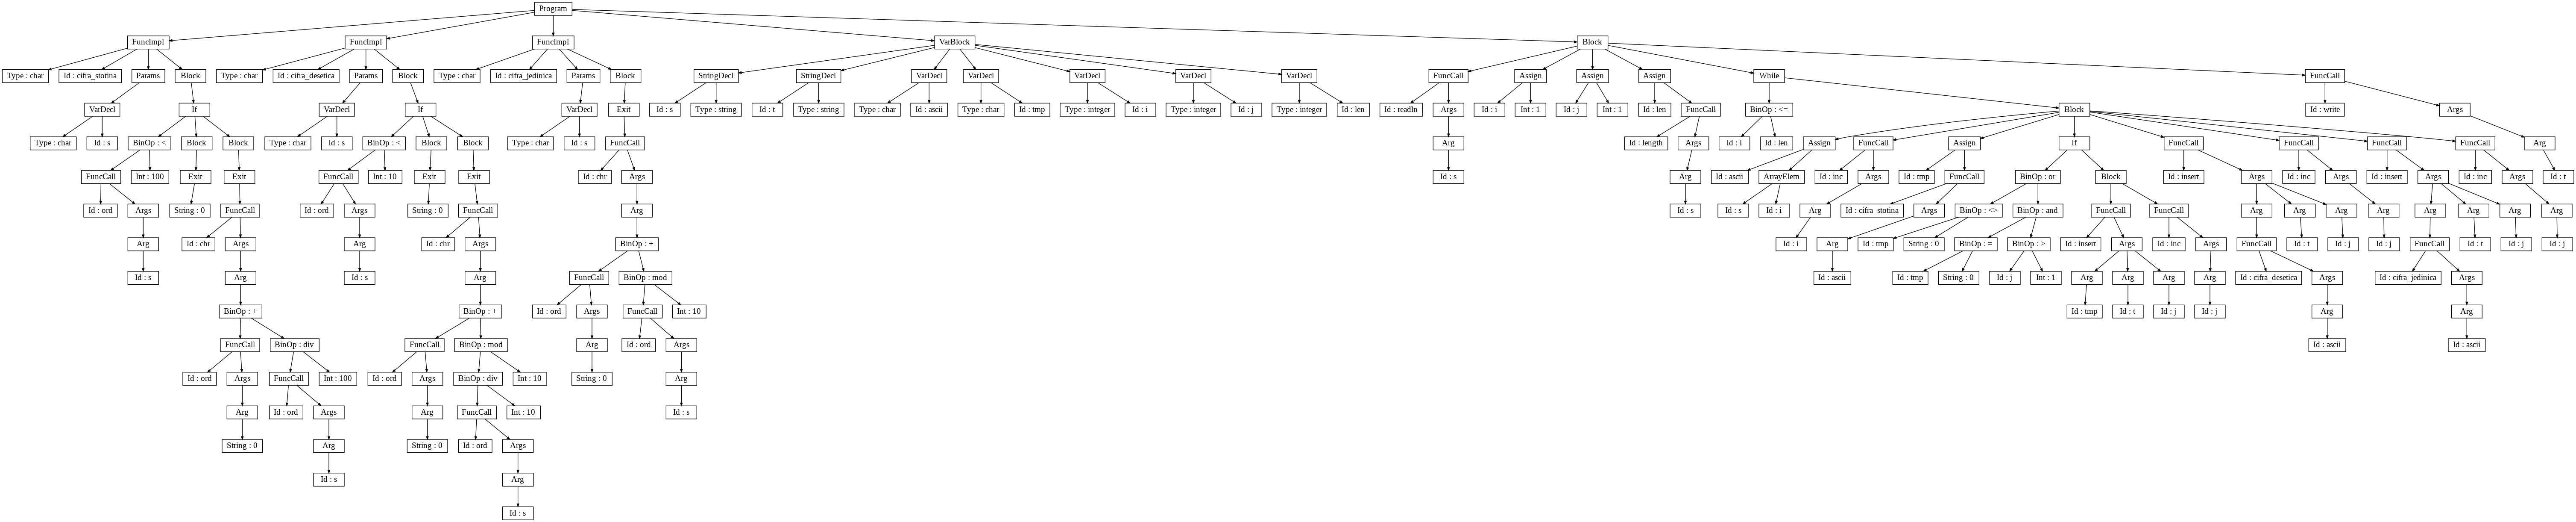

In [ ]:
test_id = 25



path = f'/content/drive/My Drive/pas/test{test_id}.pas'

with open(path, 'r') as source:
    text = source.read()
    
    lexer = Lexer(text)
    tokens = lexer.lex()
    
    parser = Parser(tokens)
    ast = parser.parse() 
    grapher = Grapher(ast)
    img = grapher.graph()



    symbolizer = Symbolizer(ast)
    symbolizer.symbolize()
    
    generator = Generator(ast)
    code = generator.generate('main.c')
  #  !make main
  #  !./main 

Image(img)

Skripta

In [ ]:
# ACINONYX - BEGIN
 
DEBUG = False # OBAVEZNO: Postaviti na False pre slanja projekta
 
if DEBUG:
   test_id = '01' # Redni broj test primera [01-16]
   path_root = '/content/drive/My Drive/pas/Druga faza/'
   args = {}
   args['src'] = f'{path_root}{test_id}/src.pas' # Izvorna PAS datoteka
   args['gen'] = f'{path_root}{test_id}/gen.c' # Generisana C datoteka
else:
   import argparse
   arg_parser = argparse.ArgumentParser()
   arg_parser.add_argument('src') # Izvorna PAS datoteka
   arg_parser.add_argument('gen') # Generisana C datoteka
   args = vars(arg_parser.parse_args())
 
with open(args['src'], 'r') as source:
   text = source.read()
   lexer = Lexer(text)
   tokens = lexer.lex()
   parser = Parser(tokens)
   ast = parser.parse()
   symbolizer = Symbolizer(ast)
   symbolizer.symbolize()
   generator = Generator(ast)
   generator.generate(args['gen'])
  # runner = Runner(ast)
  # runner.run()
 
# ACINONYX - END


In [ ]:
# GRADER - BEGIN
# 1. Preuzeti direktorijum Datoteke sa materijala
# 2. Postaviti arhivu u content direktorijum u okviru sesije
# 3. Napraviti i pokrenuti ćeliju sa komandom !unzip 'arhiva.zip'
# 4. Postaviti DEBUG promenljivu na False
# 5. Zakomentarisati linije koje počinju znakom !
# 6. Preuzeti notebook kao .py datoteku i imenovati je main.py
# 7. Postaviti main.py na putanju na koju pokazuje path_root
# 8. Postaviti DEBUG promenljivu na True
# 9. Otkomentarisati linije koje počinju znakom !
# 10. Pokrenuti grader.sh pokretanjem ove ćelije
if DEBUG:
   path_grader = f'{path_root}grader.sh'
   !chmod +x '{path_grader}' # Dozvola za izvršavanje
   !bash '{path_grader}' '{path_root}' # Pokretanje gradera
# GRADER - END


./01	OK
./02	OK
./03	OK
./04	OK
./05	OK
./06	OK
./07	OK
./08	OK
./09	OK
./10	OK
./11	OK
./12	OK
./13	OK
./14	OK
./15/1	ERROR

IN
AaBb

SRC


GEN
-722 -101 410 709 -248 -127 -799 -996 386 982 -486 455 -526 -780 

OUT
65097066098
Expected: BEGIN, Found: IF
./16/1	ERROR

IN
1

SRC


GEN
-722 -101 410 709 -248 -127 -799 -996 386 982 -486 455 -526 -780 

OUT
Greska: Koriscenje nedeklarisane promenljive
